In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
#Load your dataset
df = pd.read_csv("../../0_DataPreparation/initialdata/merged_data_with_weather_impression.csv")

#Ensure the 'Datum' column is in datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

#Define time ranges
train_start = '2013-07-01'
train_end = '2017-07-31'
val_start = '2017-08-01'
val_end = '2018-07-31'
test_start = '2018-08-01'
test_end = '2019-07-30'

#Split data
train_data = df[(df['Datum'] >= train_start) & (df['Datum'] <= train_end)]
validation_data = df[(df['Datum'] >= val_start) & (df['Datum'] <= val_end)]
test_data = df[(df['Datum'] >= test_start) & (df['Datum'] <= test_end)]

#Optional: print shapes
print("Train shape:", train_data.shape)
print("Validation shape:", validation_data.shape)
print("Test shape:", test_data.shape)

Train shape: (7517, 14)
Validation shape: (1839, 14)
Test shape: (351, 14)


In [44]:
df.head()

,Datum,Weekday,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,id,Warengruppe,Umsatz,KielerWoche,AverageTemp,Temp_Deviation,Temp_vs_Avg,Weather_Impression
0,2012-01-01,Sunday,8.0,9.82,14,58.0,NaN,NaN,NaN,NaN,6.504342,3.315658,Significantly warmer,unknown
1,2012-01-02,Monday,7.0,7.44,12,0.0,NaN,NaN,NaN,NaN,3.062303,4.377697,Significantly warmer,very good
2,2012-01-03,Tuesday,8.0,5.54,18,63.0,NaN,NaN,NaN,NaN,3.062303,2.477697,Significantly warmer,bad
3,2012-01-04,Wednesday,4.0,5.69,19,80.0,NaN,NaN,NaN,NaN,3.062303,2.627697,Significantly warmer,bad
4,2012-01-05,Thursday,6.0,5.30,23,80.0,NaN,NaN,NaN,NaN,3.062303,2.237697,Significantly warmer,bad


In [45]:
columns = train_data.columns.tolist()
columns

['Datum',
 'Weekday',
 'Bewoelkung',
 'Temperatur',
 'Windgeschwindigkeit',
 'Wettercode',
 'id',
 'Warengruppe',
 'Umsatz',
 'KielerWoche',
 'AverageTemp',
 'Temp_Deviation',
 'Temp_vs_Avg',
 'Weather_Impression']

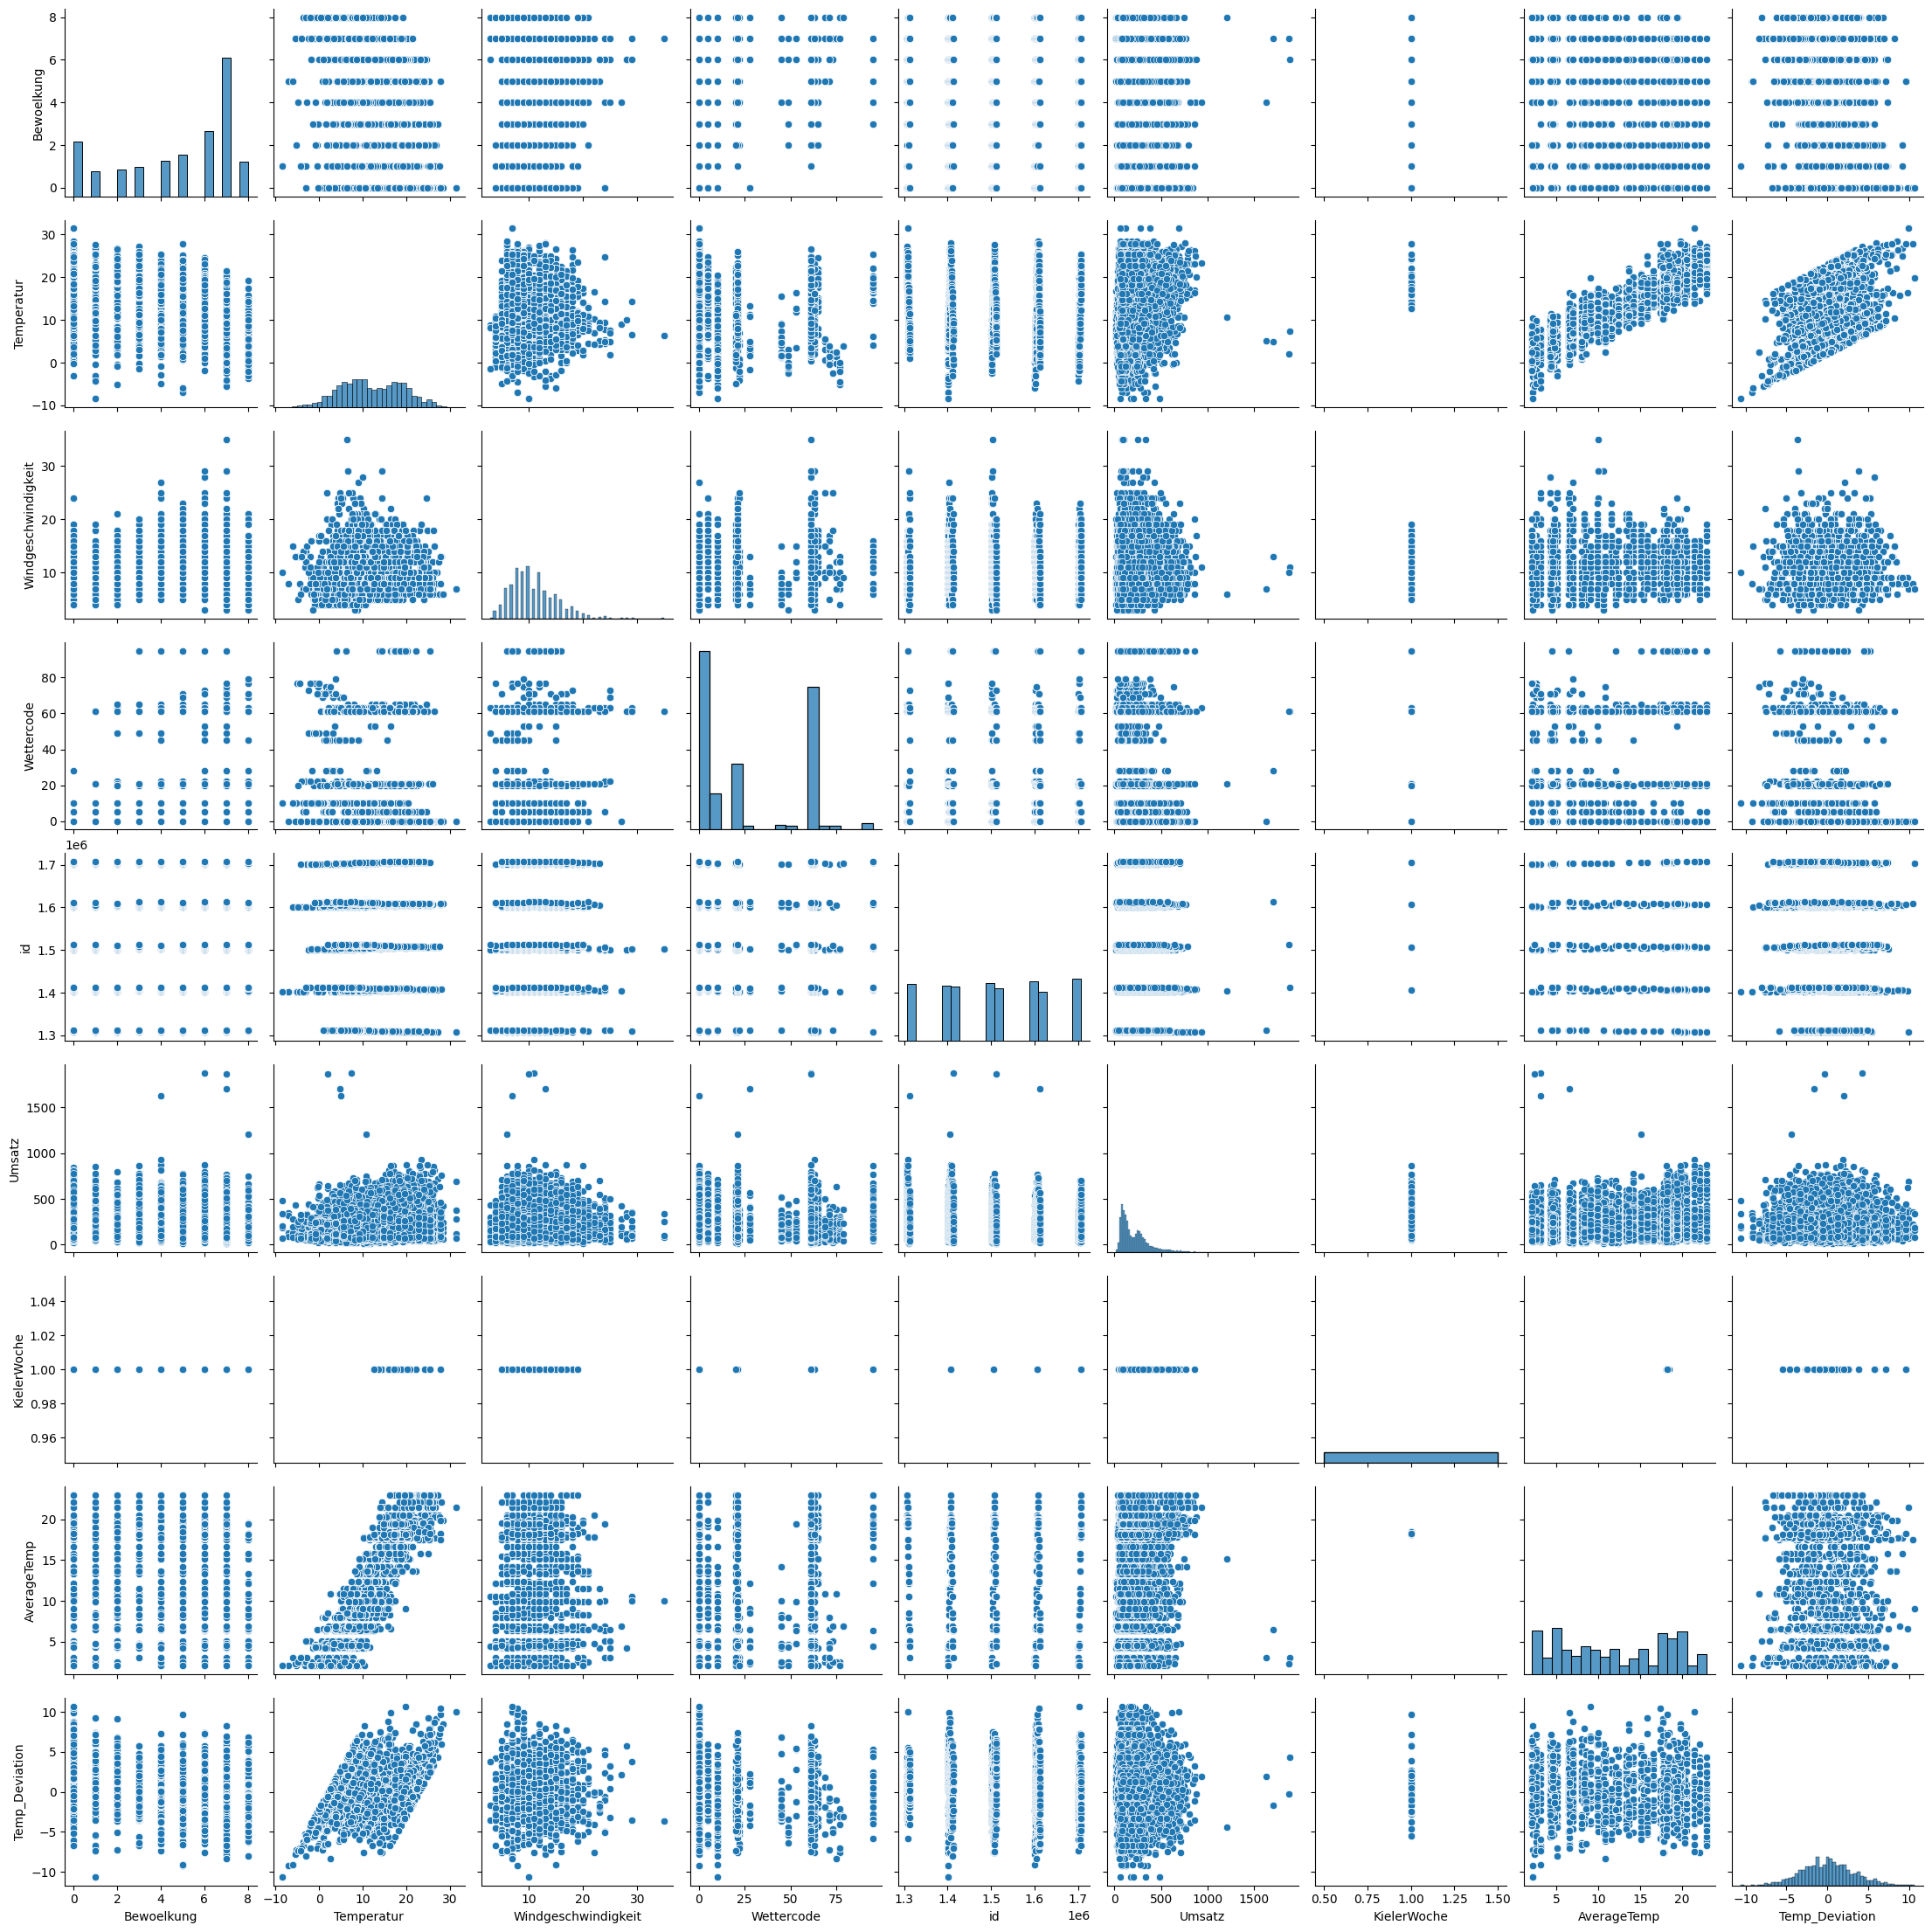

In [46]:
sns.pairplot(train_data[columns])

In [47]:
#remove all non-numeric columns for correlation
columns = [col for col in columns if train_data[col].dtype in ['float64', 'int64']]
train_data[columns].corr()

,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,id,Umsatz,KielerWoche,AverageTemp,Temp_Deviation
Bewoelkung,1.000000,-0.376459,0.042912,0.549314,0.041113,-0.085921,NaN,-0.270596,-0.283291
Temperatur,-0.376459,1.000000,0.003471,-0.204801,-0.095729,0.216570,NaN,0.892810,0.398119
Windgeschwindigkeit,0.042912,0.003471,1.000000,0.151729,0.027233,0.011454,NaN,0.014588,-0.022016
Wettercode,0.549314,-0.204801,0.151729,1.000000,0.041823,-0.046785,NaN,-0.134065,-0.180885
id,0.041113,-0.095729,0.027233,0.041823,1.000000,-0.097429,NaN,-0.068435,-0.072883
Umsatz,-0.085921,0.216570,0.011454,-0.046785,-0.097429,1.000000,NaN,0.235087,0.001433
KielerWoche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageTemp,-0.270596,0.892810,0.014588,-0.134065,-0.068435,0.235087,NaN,1.000000,-0.057753
Temp_Deviation,-0.283291,0.398119,-0.022016,-0.180885,-0.072883,0.001433,NaN,-0.057753,1.000000


In [48]:
print(train_data['Warengruppe'])

394           Brot
395       Brötchen
396      Croissant
397     Konditorei
398         Kuchen
           ...    
7906          Brot
7907      Brötchen
7908     Croissant
7909    Konditorei
7910        Kuchen
Name: Warengruppe, Length: 7517, dtype: object


Using Weekday as a second feature next to Warengruppe

In [49]:
import pandas as pd
import statsmodels.api as sm

# Define predictors columns
predictors = ["Warengruppe", "Weekday"]  

Y = train_data['Umsatz']

# Create dummy variables for each categorical predictor and concatenate them
X = pd.get_dummies(train_data[["Warengruppe", "Weekday"]], drop_first=True, dtype=int)
X = sm.add_constant(X)



# Drop rows where either X or Y has NaN
valid_idx = Y.notna() & X.notna().all(axis=1)
Y_clean = Y[valid_idx]
X_clean = X[valid_idx]

# Fit the model
model = sm.OLS(Y_clean, X_clean)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1425.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:58:14   Log-Likelihood:                -43794.
No. Observations:                7487   AIC:                         8.761e+04
Df Residuals:                    7475   BIC:                         8.769e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    111

In [50]:
import pandas as pd
import statsmodels.api as sm

# Load the test data
test_data = pd.read_csv("test.csv")

# Ensure the 'Datum' column is in datetime format and extract the weekday
test_data['Datum'] = pd.to_datetime(test_data['Datum'])
test_data['Weekday'] = test_data['Datum'].dt.day_name()

# Map 'Warengruppe' to the correct categories
mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}
test_data['Warengruppe'] = test_data['Warengruppe'].map(mapping)

# Create dummy variables for the test data
X_test = pd.get_dummies(test_data[['Warengruppe', 'Weekday']], drop_first=True, dtype=int)
X_test = sm.add_constant(X_test)  # Für das Interzept

# Ensure that the test data has the same columns as the training data
for col in X_clean.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Ensure the order of columns matches the training data
X_test = X_test[X_clean.columns]

# predict with the model
preds = results.predict(X_test)

# create submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': preds
})

submission.to_csv("submission2.csv", index=False)
print("Submission file created: submission2.csv")




Submission file created: submission2.csv


Trying Warengruppe + Weekday/ non weekday

In [51]:
import pandas as pd
import statsmodels.api as sm

# Create a new column 'Is_Weekend' which is 1 if the day is Saturday or Sunday, else 0
train_data['Is_Weekend'] = train_data['Weekday'].isin(['Saturday', 'Sunday']).astype(int)

# Define predictors: product group and weekend indicator
predictors = ['Warengruppe', 'Is_Weekend']

Y = train_data['Umsatz']

# Create dummy variables for the product group
X_warengruppe = pd.get_dummies(train_data['Warengruppe'], drop_first=True, dtype=int)

# 'Is_Weekend' is already numeric (0 or 1), so combine it with the product group dummies
X = pd.concat([X_warengruppe, train_data['Is_Weekend']], axis=1)

# Add constant for the intercept
X = sm.add_constant(X)

# Drop rows with missing values in either X or Y
valid_idx = Y.notna() & X.notna().all(axis=1)
Y_clean = Y[valid_idx]
X_clean = X[valid_idx]

# Fit the OLS regression model
model = sm.OLS(Y_clean, X_clean)
results = model.fit()

# Print model summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2607.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:58:14   Log-Likelihood:                -43800.
No. Observations:                7487   AIC:                         8.761e+04
Df Residuals:                    7480   BIC:                         8.766e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.3020      2.283     46.555      0.0

/tmp/ipykernel_1742/3330920582.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Is_Weekend'] = train_data['Weekday'].isin(['Saturday', 'Sunday']).astype(int)


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the test data
test_data = pd.read_csv("test.csv")

# Convert 'Datum' to datetime and extract the weekday name
test_data['Datum'] = pd.to_datetime(test_data['Datum'])
test_data['Weekday'] = test_data['Datum'].dt.day_name()

# Map numeric 'Warengruppe' to categorical names
mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}
test_data['Warengruppe'] = test_data['Warengruppe'].map(mapping)

# Create 'Is_Weekend' flag (1 if Saturday or Sunday, else 0)
test_data['Is_Weekend'] = test_data['Weekday'].isin(['Saturday', 'Sunday']).astype(int)

# Create dummy variables for 'Warengruppe' only (drop first category)
X_test_warengruppe = pd.get_dummies(test_data['Warengruppe'], drop_first=True, dtype=int)

# Combine with 'Is_Weekend' column
X_test = pd.concat([X_test_warengruppe, test_data['Is_Weekend']], axis=1)

# Add constant for intercept
X_test = sm.add_constant(X_test)

# Add missing columns (if any) that are in training data but not in test data, set to 0
for col in X_clean.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Reorder columns to match training data exactly
X_test = X_test[X_clean.columns]

# Predict Umsatz using the trained model
preds = results.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': preds
})

submission.to_csv("submission4.csv", index=False)
print("Submission file created: submission4.csv")


Submission file created: submission3.csv


Trying to use weather, but as in test.csv there is no weather information, so it doesn't work. But maybe good for later.

In [53]:
import pandas as pd
import statsmodels.api as sm

# Y ist die Zielvariable Umsatz
Y = train_data['Umsatz']

# Dummy-Variablen für Warengruppe und Weather_Impression erstellen (ohne Weekday)
X = pd.get_dummies(train_data[["Warengruppe", "Weather_Impression"]], drop_first=True, dtype=int)

# Konstante (Intercept) hinzufügen
X = sm.add_constant(X)

# NaN-Zeilen entfernen, falls vorhanden
valid_idx = Y.notna() & X.notna().all(axis=1)
Y_clean = Y[valid_idx]
X_clean = X[valid_idx]

# Modell fitten
model = sm.OLS(Y_clean, X_clean)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1422.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:58:14   Log-Likelihood:                -44037.
No. Observations:                7487   AIC:                         8.810e+04
Df Residuals:                    7476   BIC:                         8.817e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the test data
test_data = pd.read_csv("test.csv")

# Map 'Warengruppe' to die Kategorien, falls noch nicht gemacht
mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}
test_data['Warengruppe'] = test_data['Warengruppe'].map(mapping)

# Achtung: Hier muss sichergestellt sein, dass 'Weather_Impression' in test_data vorhanden ist
# Wenn nicht, muss sie vorher erstellt werden

# Dummy-Variablen für Warengruppe und Weather_Impression erstellen (drop_first=True)
X_test = pd.get_dummies(test_data[['Warengruppe', 'Weather_Impression']], drop_first=True, dtype=int)
X_test = sm.add_constant(X_test)  # Interzept hinzufügen

# Fehlende Spalten ergänzen, die im Trainingsmodell sind, aber im Testset fehlen
for col in X_clean.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Reihenfolge der Spalten an das Trainingsset anpassen
X_test = X_test[X_clean.columns]

# Vorhersage mit dem Modell
preds = results.predict(X_test)

# Submission DataFrame erstellen
submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': preds
})

submission.to_csv("submission5.csv", index=False)
print("Submission file created: submission5.csv")



KeyError: "['Weather_Impression'] not in index"